<a href="https://colab.research.google.com/github/lrochaqu/nyu-python-public-policy/blob/master/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trends in when different types of 311 requests occur over time


Problem Statement: Some 311 complaint types have interesting trends over time. Some are more prevalent at certain times of day, days of the week, seasons, etc. In this homework you will isolate the 10 most common complaint types and look at trends in when they occur.


In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.head()


,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [12]:
top_10 = list(df.groupby('complaint_type').size().nlargest(10).index)
top_10

['Noise - Residential',
 'HEAT/HOT WATER',
 'Illegal Parking',
 'Request Large Bulky Item Collection',
 'Blocked Driveway',
 'Noise - Street/Sidewalk',
 'Street Condition',
 'UNSANITARY CONDITION',
 'Water System',
 'Noise']

In [0]:
filtered_311 = df[df.complaint_type.isin(top_10)]

In [20]:
filtered_311.created_date = pd.to_datetime(df.created_date, format='%m/%d/%Y %I:%M:%S %p')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['hour'] = filtered_311.created_date.dt.hour


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [22]:
filtered_311.head(10)

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,day,month,weekday,weekday_name,hour
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,1,8,2,Wednesday,0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,1,8,2,Wednesday,0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,1,8,2,Wednesday,0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,1,8,2,Wednesday,0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,1,8,2,Wednesday,0
8,8,8,39887285,2018-08-01 00:03:13,08/01/2018 08:13:06 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11213,1139 SAINT MARKS AVENUE,SAINT MARKS AVENUE,SCHENECTADY AVENUE,UTICA AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:03:13 AM,The Police Department responded and upon arriv...,08/01/2018 08:13:06 AM,08 BROOKLYN,3.013540e+09,BROOKLYN,1003110.0,184925.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674233,-73.932009,"(40.674233069283225, -73.9320085867278)",308.0,2018,1,8,2,Wednesday,0
9,9,9,39885757,2018-08-01 00:03:54,08

In [67]:
complaint_date = filtered_311.groupby(['hour','date','complaint_type']).size().reset_index(name='count_requests')
complaint_date.head(10)

,hour,date,complaint_type,count_requests
0,0,2018-08-01,Blocked Driveway,8
1,0,2018-08-01,HEAT/HOT WATER,4
2,0,2018-08-01,Illegal Parking,11
3,0,2018-08-01,Noise,9
4,0,2018-08-01,Noise - Residential,29
5,0,2018-08-01,Noise - Street/Sidewalk,26
6,0,2018-08-01,Request Large Bulky Item Collection,6
7,0,2018-08-01,Street Condition,4
8,0,2018-08-01,UNSANITARY CONDITION,7
9,0,2018-08-01,Water System,2


In [68]:
complaint_date_median = complaint_date.groupby(['hour','complaint_type'])['count_requests'].median().reset_index(name='median_requests')
complaint_date_median.head(10)

,hour,complaint_type,median_requests
0,0,Blocked Driveway,13.0
1,0,HEAT/HOT WATER,11.0
2,0,Illegal Parking,15.0
3,0,Noise,6.0
4,0,Noise - Residential,41.0
5,0,Noise - Street/Sidewalk,15.0
6,0,Request Large Bulky Item Collection,5.0
7,0,Street Condition,3.0
8,0,UNSANITARY CONDITION,3.0
9,0,Water System,2.0


Text(0, 0.5, 'Median Count of 311 Requests')

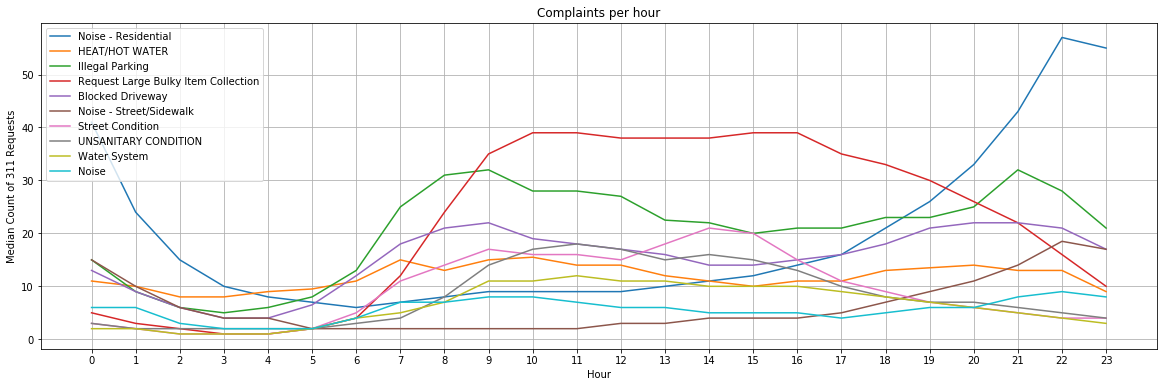

In [69]:
plt.figure(figsize=(20, 6))
for complaint in top_10:
  df_filter = complaint_date_median[complaint_date_median.complaint_type==complaint]
  plt.plot(df_filter.hour, df_filter.median_requests, label=complaint)
plt.xticks(df_filter.hour)
plt.grid()
plt.legend()
plt.title('Complaints per hour')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')

In [78]:
complaint_weekday = filtered_311.groupby(['weekday','date','complaint_type']).size().reset_index(name='count_requests')
complaint_weekday_median = complaint_weekday.groupby(['weekday','complaint_type'])['count_requests'].median().reset_index(name='median_requests_weekdays')
complaint_weekday_median.head(10)


,weekday,complaint_type,median_requests_weekdays
0,0,Blocked Driveway,372.0
1,0,HEAT/HOT WATER,292.0
2,0,Illegal Parking,509.0
3,0,Noise,147.0
4,0,Noise - Residential,419.0
5,0,Noise - Street/Sidewalk,124.0
6,0,Request Large Bulky Item Collection,666.0
7,0,Street Condition,301.0
8,0,UNSANITARY CONDITION,267.0
9,0,Water System,167.0


Text(0, 0.5, 'Median Count of 311 Requests')

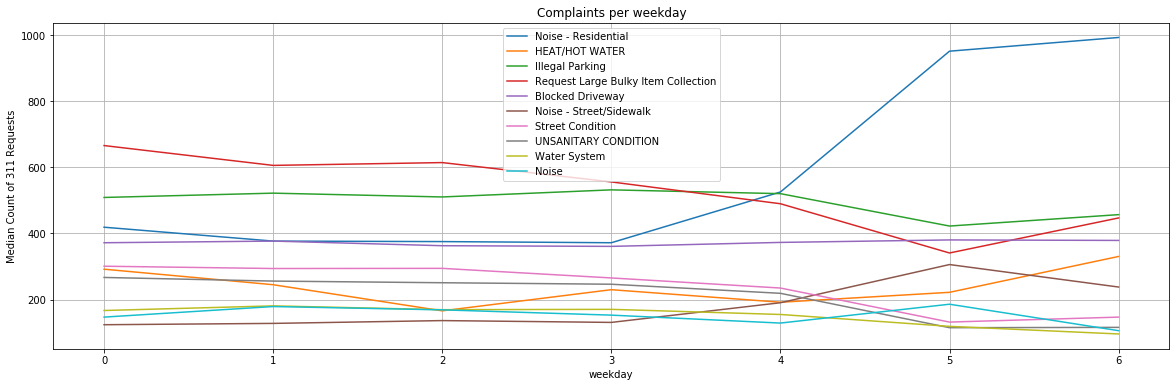

In [79]:
plt.figure(figsize=(20, 6))
for complaint in top_10:
  df_filter_weekday = complaint_weekday_median[complaint_weekday_median.complaint_type==complaint]
  plt.plot(df_filter_weekday.weekday, df_filter_weekday.median_requests_weekdays, label=complaint)
plt.xticks(df_filter_weekday.weekday)
plt.grid()
plt.legend()
plt.title('Complaints per weekday')
plt.xlabel('weekday')
plt.ylabel('Median Count of 311 Requests')

In [80]:
complaint_month = filtered_311.groupby(['month','year','complaint_type']).size().reset_index(name='count_requests')
complaint_month_median = complaint_month.groupby(['month','complaint_type'])['count_requests'].median().reset_index(name='median_requests_month')
complaint_month_median.head(10)


,month,complaint_type,median_requests_month
0,1,Blocked Driveway,11393.0
1,1,HEAT/HOT WATER,46387.0
2,1,Illegal Parking,13189.0
3,1,Noise,4805.0
4,1,Noise - Residential,16176.0
5,1,Noise - Street/Sidewalk,1760.0
6,1,Request Large Bulky Item Collection,14628.0
7,1,Street Condition,7271.0
8,1,UNSANITARY CONDITION,7047.0
9,1,Water System,6198.0


Text(0, 0.5, 'Median Count of 311 Requests')

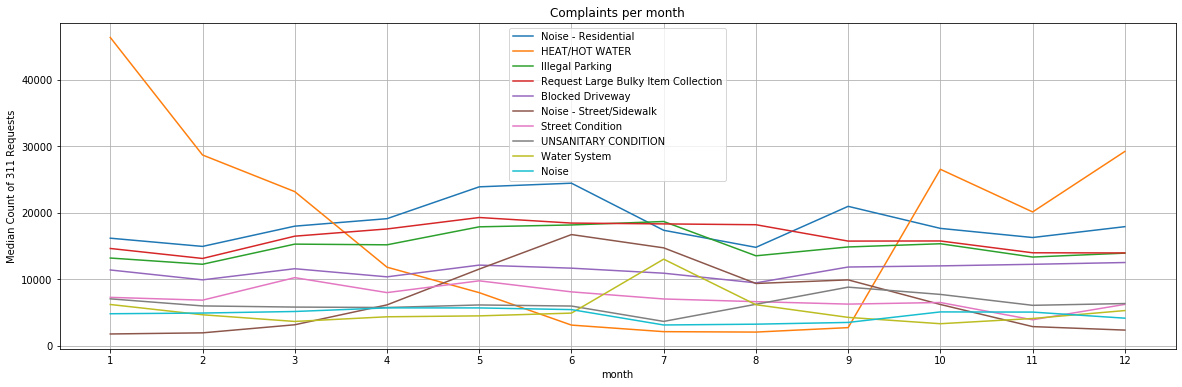

In [83]:
plt.figure(figsize=(20, 6))
for complaint in top_10:
  df_filter_month = complaint_month_median[complaint_month_median.complaint_type==complaint]
  plt.plot(df_filter_month.month, df_filter_month.median_requests_month, label=complaint)
plt.xticks(df_filter_month.month)
plt.grid()
plt.legend()
plt.title('Complaints per month')
plt.xlabel('month')
plt.ylabel('Median Count of 311 Requests')

Noise complaints are more common at night and on weekends. In contrast, illegal parking complaints are more common during the day and on weekdays. 

Heat and hot water complaints are more common during winter months: From September until May. This means ... Winter is long in NYC :(

  Blocked driveway complaints are pretty common during the entire year